In [1]:
from tensorflow.python.keras.models import save_model
from visio.models import ImNet
from visio.utils import load_mnist_dataset, split, evaluate, normalize, reshape, make_submission

## Load Data & Preprocess

In [2]:
# Load
X_train_full, y_train_full, X_test, y_test = load_mnist_dataset()
#X_train_full = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
#X_test       = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Preprocess
target_shape = (*X_test.shape[1:], 1)
X_train_full = reshape(normalize(X_train_full), target_shape=target_shape)
X_test       = reshape(normalize(X_test), target_shape=target_shape)

# Split
X_train, X_val, y_train, y_val = split(X_train_full, y_train_full)

print(f"Train: {X_train.shape} | Val: {X_val.shape} | Test: {X_test.shape}")

Train: (54000, 28, 28, 1) | Val: (6000, 28, 28, 1) | Test: (10000, 28, 28, 1)


## Build & Train

In [3]:
model = ImNet(learning_rate=1e-3, batch_size=64, epochs=50)
model.compile()
model.fit(X_train, y_train, X_val, y_val)

C:\Users\essi\PycharmProjects\venv311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compiled and augmentation ready.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,488,874 (13.31 MB)

 Trainable params: 3,486,698 (13.30 MB)

 Non-trainable params: 2,176 (8.50 KB)

Epoch 1/50


C:\Users\essi\PycharmProjects\venv311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


843/843 ━━━━━━━━━━━━━━━━━━━━ 190s 218ms/step - accuracy: 0.8041 - loss: 0.6372 - val_accuracy: 0.9830 - val_loss: 0.0621 - learning_rate: 0.0010
Epoch 2/50
  1/843 ━━━━━━━━━━━━━━━━━━━━ 4:41 335ms/step - accuracy: 1.0000 - loss: 0.0556

C:\Users\essi\PycharmProjects\venv311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


843/843 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 0.9827 - val_loss: 0.0621 - learning_rate: 0.0010
Epoch 3/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 176s 208ms/step - accuracy: 0.9635 - loss: 0.1175 - val_accuracy: 0.9877 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 4/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9844 - loss: 0.1035 - val_accuracy: 0.9868 - val_loss: 0.0460 - learning_rate: 0.0010
Epoch 5/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 180s 214ms/step - accuracy: 0.9738 - loss: 0.0848 - val_accuracy: 0.9882 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 6/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9844 - loss: 0.0921 - val_accuracy: 0.9878 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 7/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 198s 235ms/step - accuracy: 0.9783 - loss: 0.0730 - val_accuracy: 0.9913 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 8/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 0.0263 -

## Save Model

In [4]:
model.save("imnet_model.keras")

Model saved to imnet_model.keras


## Load Model (skip training)

In [5]:
model = ImNet()
model.load("imnet_model.keras")

Model loaded from imnet_model.keras


## Evaluate

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
Validation Accuracy : 0.9955 (99.55%)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       592
           1       0.99      1.00      1.00       674
           2       0.99      0.99      0.99       596
           3       1.00      0.99      1.00       613
           4       0.99      1.00      0.99       584
           5       1.00      1.00      1.00       542
           6       1.00      1.00      1.00       592
           7       1.00      0.99      0.99       627
           8       0.99      1.00      0.99       585
           9       0.99      0.99      0.99       595

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



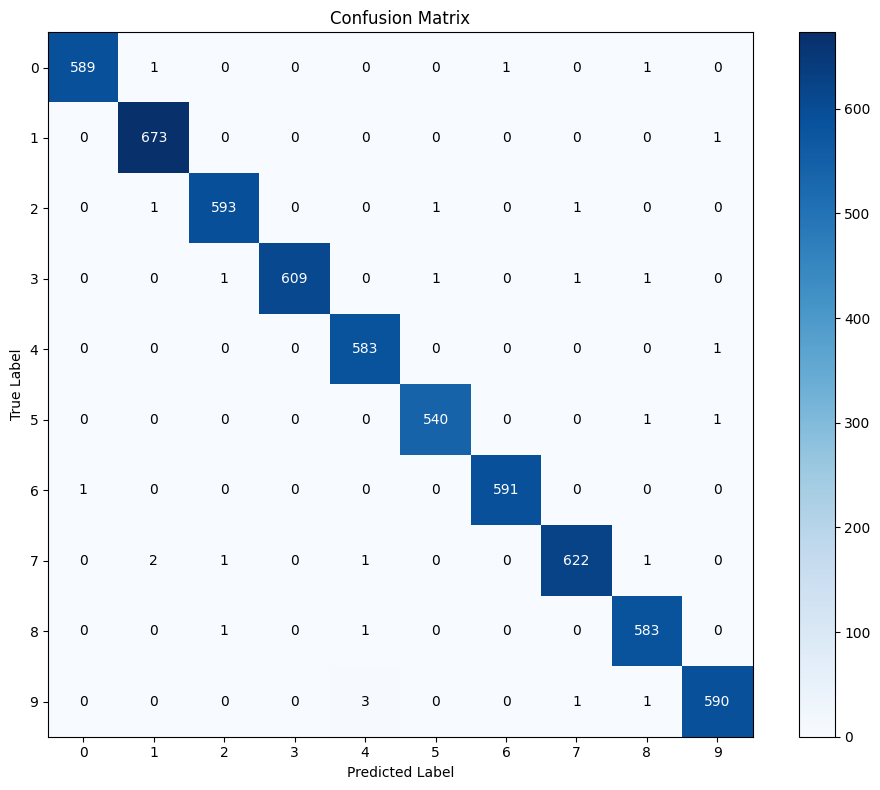

In [6]:
# Pass X_val and y_val — evaluate on the held-out val set
acc = evaluate(model, X_val, y_val)

## Predict & Save Submission

In [7]:
predictions = model.predict(X_test)
make_submission(predictions, submission_name="submission.csv")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
--- Submission Preview ---
   ImageId  Label
0        1      7
1        2      2
2        3      1
3        4      0
4        5      4
5        6      1
6        7      4
7        8      9
8        9      5
9       10      9
Shape: (10000, 2)
File saved successfully: submission.csv


,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5


In [ ]:
save_model(model.model, "imnet_model.h5")